<h1> <center> Khadim Hussain <center><h1>
<h1> <center> 19-CP-71 <center><h1>
<h1> <center> DIP LAB 08<center><h1>


# Task 01
 Write a python code for Canny edge detector without using built-in 
function and compare the result of edge detection of your code with the 
built-in function. 

<Figure size 432x288 with 0 Axes>

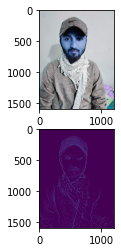

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Canny_detector(img, weak_th = None, strong_th = None):
     
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      
    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)
      
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
     
    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
      
    # setting the minimum and maximum thresholds
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
     
    # getting the dimensions of the input image 
    height, width = img.shape
      
    # Looping through every pixel of the grayscale
    # image
    for i_x in range(width):
        for i_y in range(height):
              
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
              
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
             
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
             
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
             
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
             
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
  
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
  
  
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)             
    ids = np.zeros_like(img)
      
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
             
            grad_mag = mag[i_y, i_x]
             
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
      
      
    # finally returning the magnitude of
    # gradients of edges
    return mag
  
frame = cv2.imread('/content/4.jpg')
 
# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)
  
# Displaying the input and output image 
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)

# Task 02
Write a small application to find the Canny edge detection whose threshold 
values can be varied using two trackbars. This way, you can understand 
the effect of threshold values.



Enter first threshold: 89
Enter second threshold: 27


<Figure size 432x288 with 0 Axes>

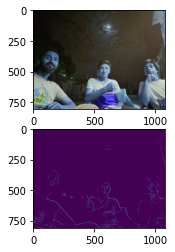

In [ ]:
frame = cv2.imread('/content/9.jpeg')
 
# Taking values from user
thresh1 = int(input('Enter first threshold: '))
thresh2 = int(input('Enter second threshold: '))

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame, thresh1, thresh2)
  
# Displaying the input and output image 
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)

# Task 03

# Task 04


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/9.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
#canny
img_canny = cv2.Canny(img,100,200)
#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
# Laplacian
laplacian = cv2.Laplacian(img_gaussian,cv2.CV_64F)

cv2_imshow(img)
cv2_imshow(img_canny)
cv2_imshow(img_sobelx)
cv2_imshow(img_sobely)
cv2_imshow(img_sobel)
cv2_imshow(img_prewittx)
cv2_imshow(img_prewitty)
cv2_imshow(img_prewittx + img_prewitty)
cv2_imshow(laplacian)

Output hidden; open in https://colab.research.google.com to view.